# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
df_titanic_filtered= df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]

df_titanic_filtered

pd.crosstab(df_titanic_filtered["embarked"], df_titanic_filtered["class"])

class,1st,2nd,3rd
embarked,,,
B,3,6,0
C,143,26,102
Q,3,7,113
S,175,245,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
#1
df_titanic_filtered.groupby('embarked')['class'].value_counts() / df_titanic_filtered.groupby('embarked')['class'].count()

embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: class, dtype: float64

The proportion of 3rd class passengers who embarked at SouthHampton was 0.54 or 54%.

In [6]:
df_titanic_filtered.groupby('class')['embarked'].value_counts() / df_titanic_filtered.groupby('class')['embarked'].count()

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: embarked, dtype: float64

The proportion of southhampton passengers in 3rd class were 0.697 or 69.7%.


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [30]:

import plotnine as p9
import pandas as pd
from plotnine import *
data = {
           'embarks' : ['S','C','B','Q'],
           '1st': [0.33333, 0.5277, 0.0244, 0.1915],
           '2nd': [0.666667, 0.0959, 0.0569, 0.2681],
           '3rd': [0.000000, 0.3764, 0.9187, 0.5405]
           }

pass_class_give_embark = pd.DataFrame(data)
pass_class_give_embark



,embarks,1st,2nd,3rd
0,S,0.33333,0.666667,0.0000
1,C,0.52770,0.095900,0.3764
2,B,0.02440,0.056900,0.9187
3,Q,0.19150,0.268100,0.5405


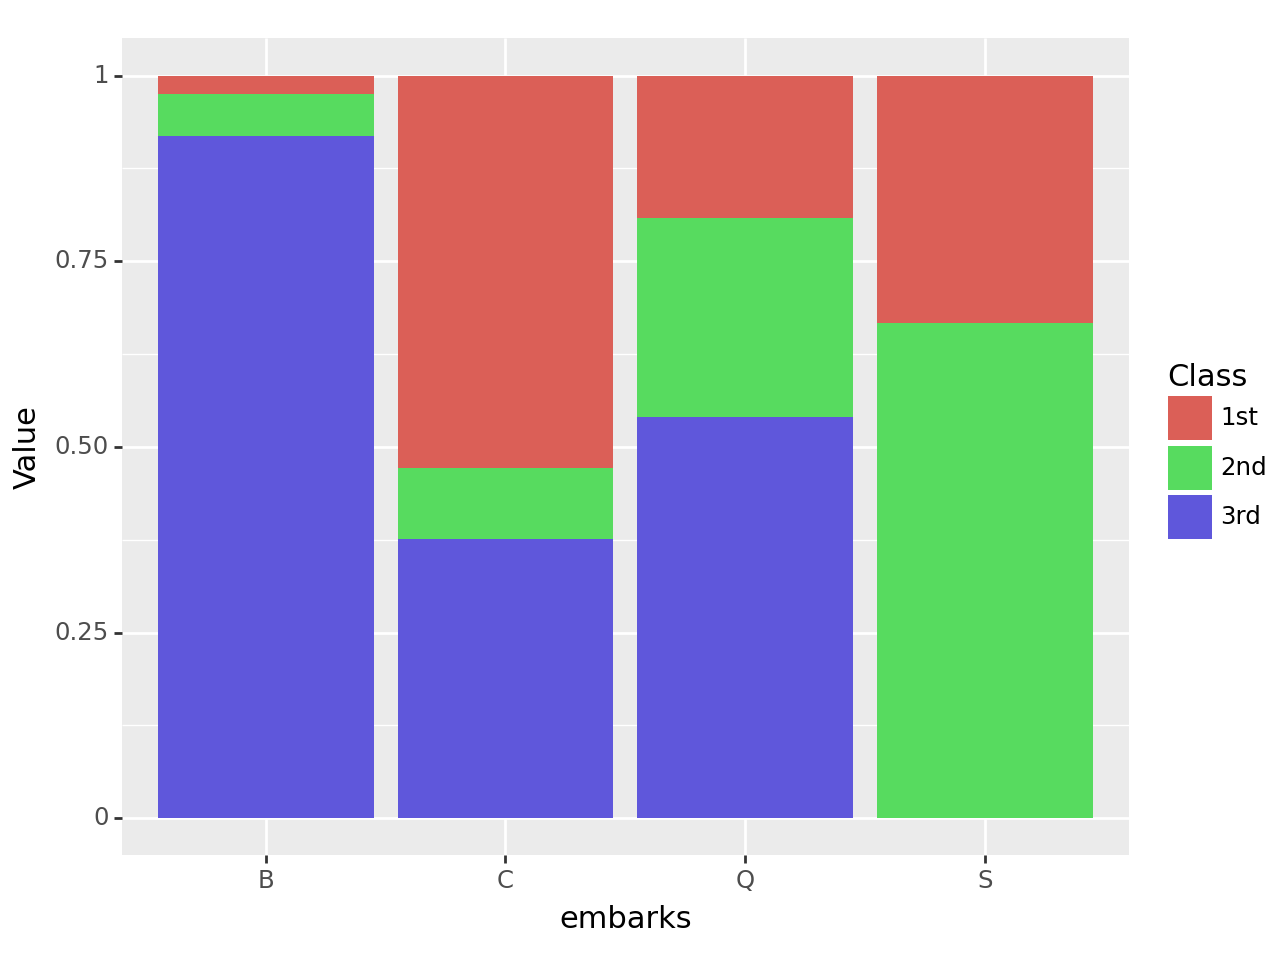

<Figure Size: (640 x 480)>

In [31]:
#stacked bar chart to show distributions
#melt the data to transform to long data
data_melt = pass_class_give_embark.melt(id_vars= 'embarks', value_vars=['1st', '2nd', '3rd'],
                                   var_name= 'Class', value_name= 'Value')
data_melt

#plot
plot = (ggplot(data_melt, aes(x='embarks', y='Value', fill= 'Class'))
                          +geom_bar(stat='identity', position='stack')
)

plot

The stacked bar chart shows the proportions by class of for each of the embarked locations. The color and stacking nature of the visualization allows the viewer to identify which class made up the majority and minority of each embarkment. This is much easier to to unpack visually compared to the numerical wide format output above. The numerical data allows us to compute probabilities easier by seeing the exact proportions of each class at each emabarkment. We could label the stacked bar chart above with those numbers in each bar but have left them out to exacerbate the differences between the two.  